<a href="https://colab.research.google.com/github/jonathanrao99/Indian-airline-tweet-sentiment-analysis/blob/main/airplane_tweet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [ ]:
pwd

'/content'

In [ ]:
data=pd.read_csv('indianairline.csv')

In [ ]:
data.head()

,Unnamed: 0,date,user,id,retweet_count,like_count,tweet_location,tweet_content,Airline,airline_sentiment,airline_sentiment_confidence,latitude,longitude
0,0,2020-07-31 22:36:45+00:00,AmarjotSinghD,1.289330e+18,0,1,NaN,@airindiain I understand that airlines industr...,airindia,negative,1.0000,28.6600,77.2300
1,1,2020-07-31 22:36:45+00:00,AmarjotSinghD,1.289330e+18,1,1,NaN,@airindiain Ideally the refund should start wi...,airindia,positive,0.3486,18.9667,72.8333
2,2,2020-07-31 22:36:45+00:00,AmarjotSinghD,1.289330e+18,0,0,NaN,@airindiain In some of the emails you have say...,airindia,neutral,0.6837,22.5411,88.3378
3,3,2020-07-31 22:36:44+00:00,AmarjotSinghD,1.289330e+18,0,0,NaN,@airindiain Have written numerous emails and y...,airindia,negative,1.0000,12.9699,77.5980
4,4,2020-07-31 22:36:44+00:00,AmarjotSinghD,1.289330e+18,0,0,NaN,@airindiain Booked round trip for my parents f...,airindia,negative,1.0000,13.0825,80.2750


In [ ]:
data.shape

(6829, 13)

In [ ]:
data.isnull().any()

Unnamed: 0                      False
date                            False
user                            False
id                              False
retweet_count                   False
like_count                      False
tweet_location                   True
tweet_content                   False
Airline                          True
airline_sentiment               False
airline_sentiment_confidence    False
latitude                        False
longitude                       False
dtype: bool

In [ ]:
data['Airline'].value_counts()

airindia      4467
spicejet       925
jetairways     555
indigo         432
vistara        321
Name: Airline, dtype: int64

Text(0.5, 1.0, 'Vistara airline')

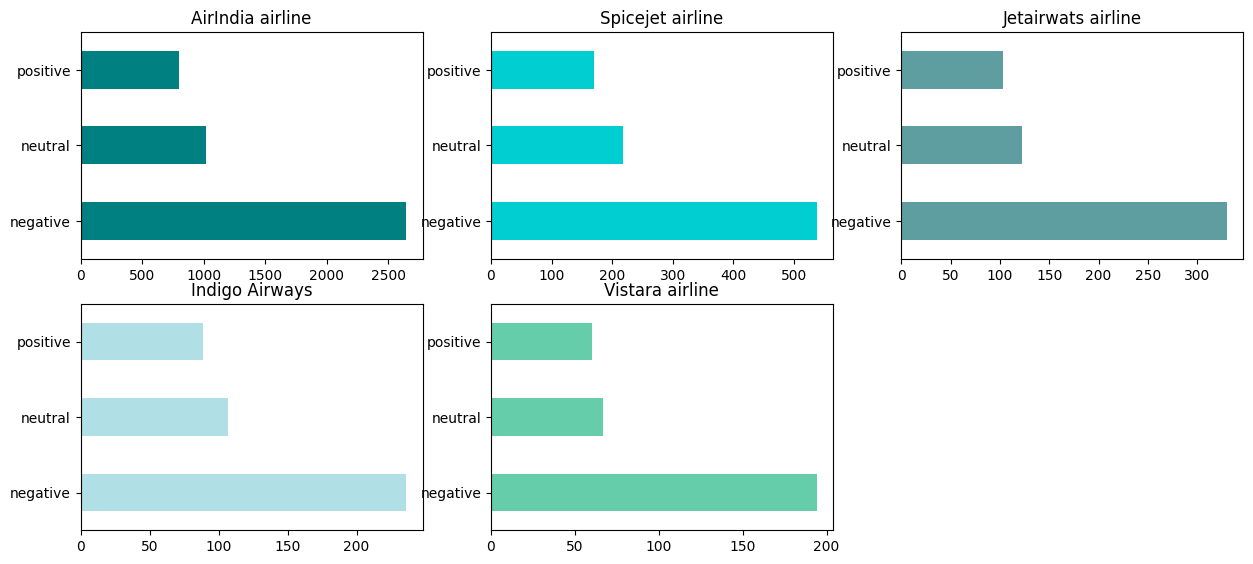

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(331)
data[data['Airline']=='airindia']['airline_sentiment'].value_counts().plot(kind='barh',color='teal')
plt.title('AirIndia airline')
plt.subplot(332)
data[data['Airline']=='spicejet']['airline_sentiment'].value_counts().plot(kind='barh',color='darkturquoise')
plt.title('Spicejet airline')
plt.subplot(333)
data[data['Airline']=='jetairways']['airline_sentiment'].value_counts().plot(kind='barh',color='cadetblue')
plt.title('Jetairwats airline')
plt.subplot(334)
data[data['Airline']=='indigo']['airline_sentiment'].value_counts().plot(kind='barh',color='powderblue')
plt.title('Indigo Airways')
plt.subplot(335)
data[data['Airline']=='vistara']['airline_sentiment'].value_counts().plot(kind='barh',color='mediumaquamarine')
plt.title('Vistara airline')

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
from shapely.geometry import Point,Polygon

In [ ]:
geo=[Point(xy) for xy in  zip(data[data['Airline']=='airindia']['longitude'][:200],data[data['Airline']=='airindia']['latitude'][:200])]
geo1=[Point(xy) for xy in  zip(data[data['Airline']=='spicejet']['longitude'][:200],data[data['Airline']=='spicejet']['latitude'][:200])]
geo2=[Point(xy) for xy in  zip(data[data['Airline']=='jetairways']['longitude'][:200],data[data['Airline']=='jetairways']['latitude'][:200])]
geo3=[Point(xy) for xy in  zip(data[data['Airline']=='indigo']['longitude'][:200],data[data['Airline']=='indigo']['latitude'][:200])]
geo4=[Point(xy) for xy in  zip(data[data['Airline']=='vistara']['longitude'][:200],data[data['Airline']=='vistara']['latitude'][:200])]


In [38]:
g=gpd.GeoDataFrame(geometry=geo)
g1=gpd.GeoDataFrame(geometry=geo1)
g2=gpd.GeoDataFrame(geometry=geo2)
g3=gpd.GeoDataFrame(geometry=geo3)
g4=gpd.GeoDataFrame(geometry=geo4)
India = gpd.read_file('india_st.shp')

In [39]:
type(India)

geopandas.geodataframe.GeoDataFrame

In [40]:
type(data)

pandas.core.frame.DataFrame

In [41]:
India.head()

,STATE,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9..."
1,ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457..."
2,ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888..."
3,ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368..."
4,BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523..."


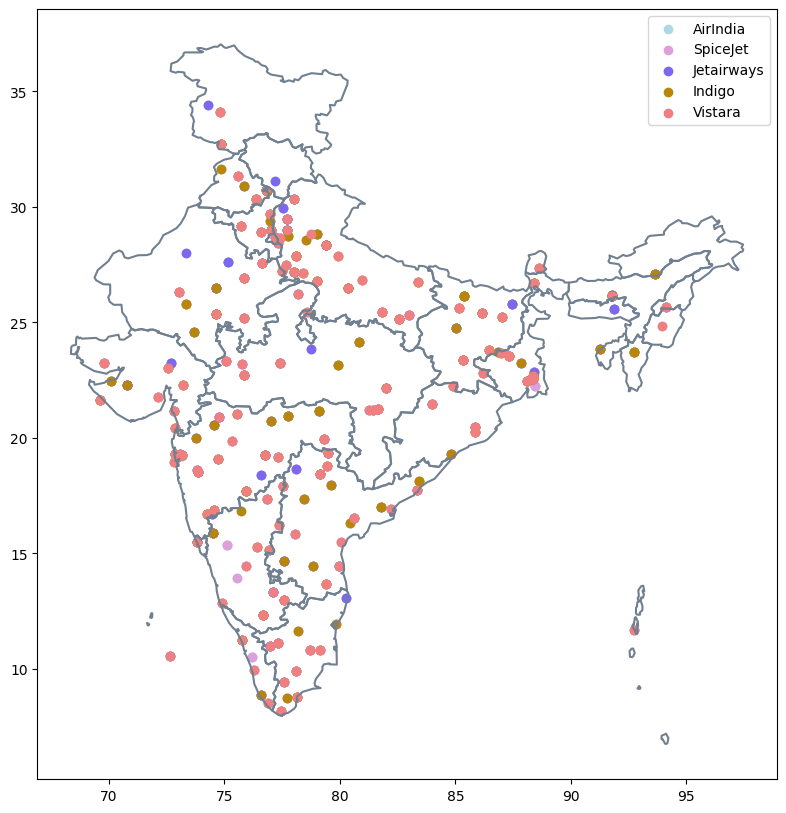

In [45]:
fig,ax=plt.subplots(figsize=(15,10))
India.boundary.plot(ax=ax,color='slategrey')
g.plot(ax=ax,color='lightblue',label='AirIndia')
g1.plot(ax=ax,color='plum',label='SpiceJet')
g2.plot(ax=ax,color='mediumslateblue',label='Jetairways')
g3.plot(ax=ax,color='darkgoldenrod',label='Indigo')
g4.plot(ax=ax,color='lightcoral',label='Vistara')
plt.legend()

In [46]:
data['retweet_count'].value_counts()

0      4658
1      1132
2       486
3       176
4       111
5        54
6        49
9        21
8        20
7        20
10       12
13       12
11       11
14        9
12        7
15        6
17        4
25        4
19        4
21        3
18        3
24        3
22        2
52        2
42        2
20        2
31        1
36        1
87        1
113       1
35        1
152       1
88        1
78        1
124       1
446       1
26        1
61        1
43        1
56        1
30        1
27        1
Name: retweet_count, dtype: int64

In [47]:
data[data['retweet_count']==44]
data[data['retweet_count']==32].index
data[data['retweet_count']==22].index

Int64Index([192, 897], dtype='int64')

In [53]:
data.iloc[511]['tweet_content']

'@airindiain Boycott #AirIndia they are just making us fool'

In [55]:
data.iloc[3]['tweet_content']

"@airindiain Have written numerous emails and you are such a hopeless people that you don't even reply to all the emails. If I call customer care the wait time is 2-3 hours. @HardeepSPuri @DGCAIndia @MoCA_GoI @PMOIndia #AirIndia  #dgca #airindiafraud"

In [56]:
data.iloc[4111]['tweet_content']

'@jetairways2020 @JetAirways also has short haul #Boeing737 aircrafts Pilots &amp; CabinCrew to do repatriation flights to Singapore, UAE &amp; other Gulf countries #JetAirways #9W #JetRevival #MakeJetFlyAgain #SaveJetAirways'